# Exercise in overfitting and underfitting

In class we discussed the notions of underfitting and overfitting in machine learning.

In this notebook I demonstrate these phenomena in the context of regression with a single feature such as height and a single outcome such as weight.

First, suppose that we have some means of drawing sample individuals from some population and that there is a quadratic relationship between their height and weight, with Gaussian noise:

In [37]:
import numpy
import matplotlib.pyplot as plt

# Generate training and test data

height_train = numpy.matrix(numpy.random.normal(160, 8, (10,1)))
height_test = numpy.matrix(numpy.random.normal(160, 8, (10,1)))

X_train_2 = numpy.concatenate([numpy.ones((10,1)), height_train, numpy.multiply(height_train, height_train)], 1)
X_test_2 = numpy.concatenate([numpy.ones((10,1)), height_test, numpy.multiply(height_test, height_test)], 1)

theta_gt = numpy.matrix([-426, 5.31, -0.0139]).transpose()

weight_train = X_train_2 * theta_gt + numpy.random.normal(0, 1, (10, 1))
weight_test = X_test_2 * theta_gt + numpy.random.normal(0, 1, (10, 1))

$\mathrm{for} \; i \in 1..m$

$\; \; \; \; x^{(i)}_{train} \sim {\cal N}(160, 64)$

$\; \; \; \; x^{(i)}_{test} \sim {\cal N}(160, 64)$

$\mathtt{X}_{train} = \begin{bmatrix} 1 &  x_{train}^{(1)} & (x_{train}^{(1)})^2 \\
1 & x_{train}^{(2)} & (x_{train}^{(2)})^2 \\
\vdots & \vdots & \vdots \end{bmatrix} \; \; \mathtt{X}_{test} = \begin{bmatrix} 1 &  x_{test}^{(1)} & (x_{test}^{(1)})^2 \\
1 & x_{test}^{(2)} & (x_{test}^{(2)})^2 \\
\vdots & \vdots & \vdots \end{bmatrix}$

$\mathbf{\theta}^{gt} = \begin{bmatrix} -426 & 5.31 & -0.0139 \end{bmatrix}^{\top}$

$\mathrm{for} \; i \in 1..m$

$\; \; \; \; y^{(i)}_{train} \sim {\cal N}(\mathbf{\theta}^{gt\top}\mathbf{x}_{train}^{(i)}, 1)$

$\; \; \; \; y^{(i)}_{test} \sim {\cal N}(\mathbf{\theta}^{gt \top} \mathbf{x}^{(i)}_{test}, 1)$

Let's plot the data:

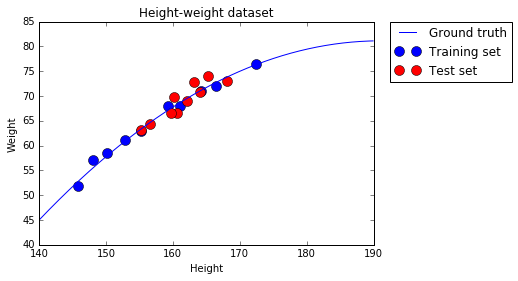

In [38]:
# Plot the ground truth curve and the sample data

train_series, = plt.plot(X_train_2[:,1], weight_train, 'bo', markersize=10, label='Training set')
test_series, = plt.plot(X_test_2[:,1], weight_test, 'ro', markersize=10, label='Test set')
def f2(x,theta):
    n = numpy.size(x)
    x1 = numpy.matrix(x).transpose()
    X = numpy.concatenate([numpy.ones((n,1)), x1, numpy.multiply(x1, x1)], 1)
    return X * theta
x = numpy.arange(140, 190, 0.1)
ground_truth, = plt.plot(x, f2(x, theta_gt), 'b', label='Ground truth')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-weight dataset')
plt.legend(handles=[ground_truth, train_series, test_series], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Next we fit a linear model and get the cost for the test and train sets:

In [39]:
X_train_1 = numpy.concatenate([numpy.ones((10,1)), height_train], 1)
X_test_1 = numpy.concatenate([numpy.ones((10,1)), height_test], 1)
theta_1 = numpy.linalg.inv(X_train_1.transpose() * X_train_1) * X_train_1.transpose() * weight_train
residuals_train = weight_train - X_train_1 * theta_1
cost_train = residuals_train.transpose() * residuals_train
residuals_test = weight_test - X_test_1 * theta_1
cost_test = residuals_test.transpose() * residuals_test

Design matrix for linear model:

$\mathtt{X}_{train} = \begin{bmatrix} 1 &  x_{train}^{(1)} \\
1 & x_{train}^{(2)} \\
\vdots & \vdots \end{bmatrix} \; \; \mathtt{X}_{test} = \begin{bmatrix} 1 &  x_{test}^{(1)} \\
1 & x_{test}^{(2)} \\
\vdots & \vdots \end{bmatrix}$

$\mathbf{\theta}_1 = (\mathtt{X}_{train}^\top\mathtt{X}_{train})^{-1}\mathtt{X}_{train}^\top \mathbf{y}_{train}$

$J_{train}(\mathbf{\theta}_1) = (\mathbf{y}-\mathtt{X}_{train}\mathbf{\theta}_1)^\top(\mathbf{y}-\mathtt{X}_{train}\mathbf{\theta}_1)$

$J_{test}(\mathbf{\theta}_1) = (\mathbf{y}-\mathtt{X}_{test}\mathbf{\theta}_1)^\top(\mathbf{y}-\mathtt{X}_{test}\mathbf{\theta}_1)$

Let's plot the result.

Degree 1 fit: training cost 13.365873, test cost 26.018797


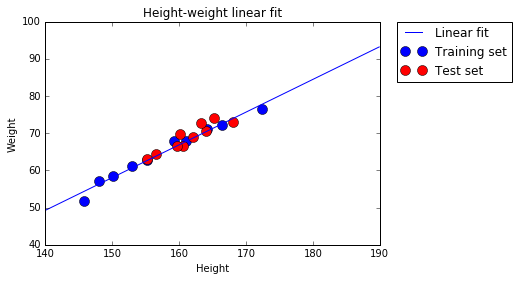

In [40]:
print('Degree 1 fit: training cost %f, test cost %f' % (cost_train, cost_test))
train_series, = plt.plot(X_train_1[:,1], weight_train, 'bo', markersize=10, label='Training set')
test_series, = plt.plot(X_test_1[:,1], weight_test, 'ro', markersize=10, label='Test set')
def f1(x,theta):
    n = numpy.size(x)
    x1 = numpy.matrix(x).transpose()
    X = numpy.concatenate([numpy.ones((n,1)), x1], 1)
    return X * theta
x = numpy.arange(140, 190, 0.1)
linear_fit, = plt.plot(x, f1(x, theta_1), 'b', label='Linear fit')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-weight linear fit')
plt.legend(handles=[linear_fit, train_series, test_series], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Similarly, we perform the quadratic fit, which should be "best:"

In [41]:
theta_2 = numpy.linalg.inv(X_train_2.transpose() * X_train_2) * X_train_2.transpose() * weight_train
residuals_train = weight_train - X_train_2 * theta_2
cost_train = residuals_train.transpose() * residuals_train
residuals_test = weight_test - X_test_2 * theta_2
cost_test = residuals_test.transpose() * residuals_test

Using the design matrix for the quadratic model, we compute

$\mathbf{\theta}_2 = (\mathtt{X}_{train}^\top\mathtt{X}_{train})^{-1}\mathtt{X}_{train}^\top \mathbf{y}_{train}$

$J_{train}(\mathbf{\theta}_2) = (\mathbf{y}-\mathtt{X}_{train}\mathbf{\theta}_2)^\top(\mathbf{y}-\mathtt{X}_{train}\mathbf{\theta}_2)$

$J_{test}(\mathbf{\theta}_2) = (\mathbf{y}-\mathtt{X}_{test}\mathbf{\theta}_2)^\top(\mathbf{y}-\mathtt{X}_{test}\mathbf{\theta}_2)$

Degree 2 fit: training cost 5.521067, test cost 19.120760


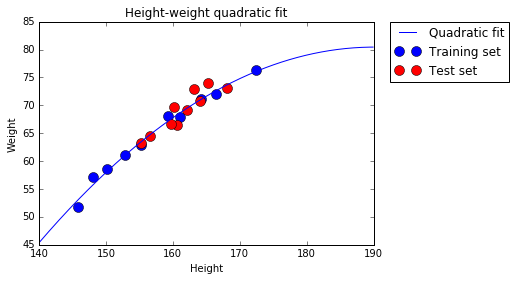

In [42]:
print('Degree 2 fit: training cost %f, test cost %f' % (cost_train, cost_test))
train_series, = plt.plot(X_train_1[:,1], weight_train, 'bo', markersize=10, label='Training set')
test_series, = plt.plot(X_test_1[:,1], weight_test, 'ro', markersize=10, label='Test set')
quadratic_fit, = plt.plot(x, f2(x, theta_2), 'b', label='Quadratic fit')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-weight quadratic fit')
plt.legend(handles=[quadratic_fit, train_series, test_series], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In some runs, you may see that even though the data were generated according to a quadratic relationship between x and y, when there are so few data and there is a test datum not well represented by the training set, we may encounter overfitting with a quadratic fit!

Let's try re-running the analysis with $m=20$ training items. We should find that the quadratic fit is almost always better on the test set than the linear fit, but a cubic fit should already have overfitting.

In [43]:
# Training/test set size

M = 20

# Generate data

height_train = numpy.matrix(numpy.random.normal(160, 8, (M,1)))
height_test = numpy.matrix(numpy.random.normal(160, 8, (M,1)))
X_train = numpy.concatenate([numpy.ones((M,1)), height_train, numpy.multiply(height_train, height_train)], 1)
X_test = numpy.concatenate([numpy.ones((M,1)), height_test, numpy.multiply(height_test, height_test)], 1)
weight_train = X_train * theta_gt + numpy.random.normal(0, 1, (M, 1))
weight_test = X_test * theta_gt + numpy.random.normal(0, 1, (M, 1))

Now we train the different models and plot the resulting cost curves:

Degree 1:
Degree 1 fit with M=20: training cost 44.431682, test cost 19.329874
Degree 2:
Degree 2 fit with M=20: training cost 10.528985, test cost 9.019145
Degree 3:
Degree 3 fit with M=20: training cost 7.431269, test cost 14.492479
Degree 4:
Degree 4 fit with M=20: training cost 6.325481, test cost 17.374924


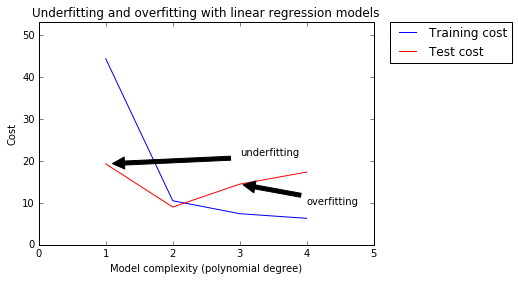

In [44]:
# Fit models of several degrees and record their costs

max_degree = 4
X_train = numpy.matrix(numpy.ones((M,1)))
X_test = numpy.matrix(numpy.ones((M,1)))
cost_train = numpy.zeros(max_degree)
cost_test = numpy.zeros(max_degree)
for degree in range(1,max_degree+1):
    print("Degree %d:" % degree)
    X_train = numpy.concatenate([X_train, numpy.multiply(X_train[:,degree-1],height_train)], 1)
    X_test = numpy.concatenate([X_test, numpy.multiply(X_test[:,degree-1],height_test)], 1)
    theta = numpy.linalg.inv(X_train.transpose() * X_train) * X_train.transpose() * weight_train
    residuals_train = weight_train - X_train * theta
    cost_train[degree-1] = residuals_train.transpose() * residuals_train
    residuals_test = weight_test - X_test * theta
    cost_test[degree-1] = residuals_test.transpose() * residuals_test
    print('Degree %d fit with M=%d: training cost %f, test cost %f' % (degree, M, cost_train[degree-1], cost_test[degree-1]))

# Plot the training and test cost curves

train_series, = plt.plot(numpy.arange(1,max_degree+1), cost_train, 'b-', markersize=10, label='Training cost')
test_series, = plt.plot(numpy.arange(1,max_degree+1), cost_test, 'r-', markersize=10, label='Test cost')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('Cost')
plt.xlim(0,max_degree+1)
plt.ylim(0,1.2*(max(max(cost_train),max(cost_test))))
plt.title('Underfitting and overfitting with linear regression models')
plt.legend(handles=[train_series, test_series], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.annotate('underfitting', xy=(1, cost_test[0]), xytext=(3, 1.1*cost_test[0]),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('overfitting', xy=(3, cost_test[2]), xytext=(4, 0.5*cost_test[0]),
            arrowprops=dict(facecolor='black', shrink=0.05))

You'll get different results with different random data sets. In some cases, you might get "lucky" with the test data set and find that degree 3 and higher models happen to fit the test set better than the degree 2 model.

Antoher point: if you try to build higher-degree models, you might find that the cost gets very bad even for the training set. This is due to numerical instability. If $x$ is large, $x^5$ will be very large, and the combination of large and small numbers in the same calculation, accumulation of roundoff error, and operations like matrix inversion all conspire to give inaccurate results. There are many ways to deal with this; we'll talk about some of them later in the class. 

To summarize, we see clearly that overfitting and underfitting occur when the model is insufficiently complex to capture the variability in the data or when there are too few examples to accurately constrain a
complex model's parameters.